Numpy. Многое о том как.

<!-- Для начала подргузим набор библиотеку Pandas и набор данных titanic -->

In [1]:
# import pandas as pd


import numpy as np

In [2]:


# Создадим массив например четырехмерный
arr = np.arange(36).reshape(2, 2, 3, 3)
print(arr)

[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]


 [[[18 19 20]
   [21 22 23]
   [24 25 26]]

  [[27 28 29]
   [30 31 32]
   [33 34 35]]]]


In [3]:
# Проверим его размерность
arr.shape

(2, 2, 3, 3)

Как видим это четыремерный массив, размерность каждого блока составляет 3х3, всего блоков 4.
В прицнипе в большинстве случаев можно обойтись болеем простыми двух или трех мерными массивами, но и подобные тоже встречаются
например в структурированных базах данныхи или при оцифровке изображений

In [4]:
# Подсчитаем переход от 
# Создадим 
np.random.seed(250)
x = np.random.choice([True, False], size=10000)
print(x)


[ True False  True ...  True False  True]


In [5]:
# Использование классических способов подсчета
def count_transitions(x) -> int:
        count = 0
        for i, j in zip(x[:-1], x[1:]):
            if j and not i:
                count += 1
        return count
        
print( count_transitions(x))

2473


In [6]:
# как это можно сделать с помощью numpy
np.count_nonzero(x[:-1] < x[1:])


2473

In [7]:
# Сравним время выполнения каждого способа

from timeit import timeit
# 
setup = 'from __main__ import count_transitions, x; import numpy as np'
num = 1000
t1 = timeit('count_transitions(x)', setup=setup, number=num)
t2 = timeit('np.count_nonzero(x[:-1] < x[1:])', setup=setup, number=num)
print('Speed difference: {:0.1f}x'.format(t1 / t2))


Speed difference: 52.3x


Какую максимальную прибыль можно получить при первоначальной купле и дальнешей продаже условного финансового инструмента:

In [8]:
# Функция поиск разницы между текущей ценой и минимумом:
def profit(prices):
    
        max_px = 0
        min_px = prices[0]
        
        for px in prices[1:]:
            
            min_px = min(min_px, px)
            max_px = max(px - min_px, max_px)
            
        return max_px
    
prices = (370, 260, 290, 130, 190, 150)
print(profit(prices))


60


In [9]:
# Create mostly NaN array with a few 'turning points' (local min/max).
prices = np.full(100, fill_value=np.nan)
prices[ [0, 25, 60, -1] ] = [80., 30., 75., 50.]
# Linearly interpolate the missing values and add some noise.
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
prices += np.random.randn(len(prices)) * 2

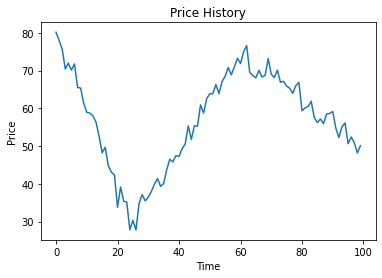

In [10]:
import matplotlib.pyplot as plt

# Warning! This isn't a fully correct solution, but it works for now.
# If the absolute min came after the absolute max, you'd have trouble.

mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 12, 'linestyle': ''}
fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], color='green', **kwargs)
ax.plot(mx, prices[mx], color='red', **kwargs)

In [11]:
# Аккумулируем минимумы
cummin = np.minimum.accumulate

In [12]:
# Реализация с помощю Numpy
def profit_with_numpy(prices):
    
     #"""Price minus cumulative minimum price, element-wise."""
     prices = np.asarray(prices)
    
     return np.max(prices - cummin(prices))

profit_with_numpy(prices)

np.allclose(profit_with_numpy(prices), profit(prices))


True

In [13]:
# Создадим временный ряд с потенциальными ценами
seq = np.random.randint(0, 100, size=10000)
print(seq)

[85 60 40 ...  3 92 56]


In [14]:
# Сравним время:

setup = ('from __main__ import profit_with_numpy, profit, seq;'
           ' import numpy as np')

num = 250
pytime = timeit('profit(seq)', setup=setup, number=num)
nptime = timeit('profit_with_numpy(seq)', setup=setup, number=num)
print('Speed difference: {:0.1f}x'.format(pytime / nptime))

Speed difference: 130.2x


In [15]:
# Операция с массивами имеющими одинаковую размерность:
a = np.array([1.5, 2.5, 3.5])
b = np.array([10., 5., 1.])
a / b

array([0.15, 0.5 , 3.5 ])

In [16]:
# Создадим набор данных
sample = np.random.normal(loc=[2., 20.], scale=[1., 3.5],
                              size=(3, 2))
sample

array([[ 0.59520824, 17.81767945],
       [ 0.89468116, 20.08738952],
       [ 0.11440006, 12.50619631]])

In [17]:
# Средние значения в столбцах
mu = sample.mean(axis=0)
mu

array([ 0.53476316, 16.80375509])

In [18]:
print('sample:', sample.shape, '| means:', mu.shape)

#  Непосредственно вычтем среднее
sample - mu


sample: (3, 2) | means: (2,)


array([[ 0.06044509,  1.01392436],
       [ 0.359918  ,  3.28363442],
       [-0.42036309, -4.29755879]])

In [19]:
# Стандартизация каждого столбца:
(sample - sample.mean(axis=0)) / sample.std(axis=0)


array([[ 0.18806633,  0.31914879],
       [ 1.11983391,  1.03357607],
       [-1.30790025, -1.35272486]])

In [20]:
# Увеличим размерность массива чтобы провести необходимые манипуляции
sample - sample.min(axis=1)[:, None]

# Вычтем минимум
sample.min(axis=1)[:, None]  # 3 minimums across 3 rows


array([[0.59520824],
       [0.89468116],
       [0.11440006]])

In [21]:
# Допустим, у вас есть следующие четыре массива:
a = np.sin(np.arange(10)[:, None])
b = np.random.randn(1, 10)
c = np.full_like(a, 10)
d = 8

In [22]:
# Перед проверкой форм NumPy сначала преобразует скаляры в массивы с одним элементом:
arrays = [np.atleast_1d(arr) for arr in (a, b, c, d)]

for arr in arrays:
     print(arr.shape)

(10, 1)
(1, 10)
(10, 1)
(1,)


In [23]:
# Вычислим размер  массива arr
len(set(arr.shape for arr in arrays)) == 1

False

In [24]:
# вычислим число измерений массива arr
len(set((arr.ndim) for arr in arrays)) == 1

False

In [25]:
# Определим максимальную размерность
maxdim = max(arr.ndim for arr in arrays)  # Maximum dimensionality
# Добавим Shape
shapes = np.array([(1,) * (maxdim - arr.ndim) + arr.shape for arr in arrays])

print(shapes)

[[10  1]
 [ 1 10]
 [10  1]
 [ 1  1]]


In [26]:
# Проверяем равна ли длина каждого измерения 1:
masked = np.ma.masked_where(shapes == 1, shapes)
# равны ли нулю разности между столбцами (np.ptp()) от пика к пику:
np.all(masked.ptp(axis=0) == 0)  # ptp: max — min


True

In [27]:
# Инкапсулированная в одной функции, логика выглядит следующим образом:
def can_broadcast(*arrays) -> bool:
        arrays = [np.atleast_1d(arr) for arr in arrays]
        if len(set(arr.shape for arr in arrays)) == 1:
            return True
        if len(set((arr.ndim) for arr in arrays)) == 1:
            return True
        maxdim = max(arr.ndim for arr in arrays)
        shapes = np.array([(1,) * (maxdim - arr.ndim) + arr.shape
                           for arr in arrays])
        masked = np.ma.masked_where(shapes == 1, shapes)
        return np.all(masked.ptp(axis=0) == 0)

can_broadcast(a, b, c, d)

True

In [28]:
# функция проверки предварительной работоспособности:
def can_broadcast(*arrays) -> bool:
        try:
            np.broadcast(*arrays)
            return True
        except ValueError:
            return False

can_broadcast(a, b, c, d)

True

In [29]:
# Машинное обучение является одной из областей, которая часто может использовать векторизацию и вещание. 
# Допустим, у вас есть вершины треугольника (каждая строка является координатой x, y):

tri = np.array([ [1, 1],
                 [3, 1],
                 [2, 3] ])


In [30]:
# centroid этого «кластера» является координатой (x, y), которая является арифметикой среднее значение каждого столбца:
centroid = tri.mean(axis=0)
print(centroid)

[2.         1.66666667]


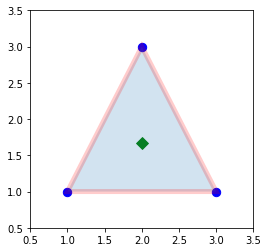

In [31]:
# Посмотрим как это выглядит
trishape = plt.Polygon(tri, edgecolor='r', alpha=0.2, lw=5)
_, ax = plt.subplots(figsize=(4, 4))
ax.add_patch(trishape)
ax.set_ylim([.5, 3.5])
ax.set_xlim([.5, 3.5])
ax.scatter(*centroid, color='g', marker='D', s=70)
ax.scatter(*tri.T, color='b',  s=70)

In [32]:
# Таким образом, для набора координат в tri сверху, евклидово расстояние каждой точки от начала координат (0, 0) будет:
np.sum(tri**2, axis=1) ** 0.5  # Or: np.sqrt(np.sum(np.square(tri), 1))


array([1.41421356, 3.16227766, 3.60555128])

In [33]:
# Вы можете признать, что мы на самом деле просто находим евклидовы нормы:
np.linalg.norm(tri, axis=1)


array([1.41421356, 3.16227766, 3.60555128])

In [34]:
# Вместо ссылки на начало координат вы также можете найти норму каждой точки относительно центроида треугольника:
np.linalg.norm(tri - centroid, axis=1)

array([1.20185043, 1.20185043, 1.33333333])

In [35]:
X = np.repeat([ [5, 5], [10, 10] ], [5, 5], axis=0)
X = X + np.random.randn(*X.shape)  # 2 distinct "blobs"
centroids = np.array([ [5, 5], [10, 10] ])


In [36]:
# Посмотрим содержимое X
X

array([[ 5.90543558,  5.85249519],
       [ 4.83350373,  3.51437696],
       [ 5.12266211,  5.19885673],
       [ 3.91487495,  3.39679006],
       [ 3.77937642,  4.32130786],
       [ 8.62687298,  8.52629556],
       [ 8.91293618, 10.90605328],
       [10.71308229,  9.92320785],
       [11.42241226, 10.42463622],
       [10.81588492, 10.84456983]])

In [37]:
# Посмотрим содержимое centroids
centroids

array([[ 5,  5],
       [10, 10]])

Другими словами, мы хотим ответить на вопрос, к какому центроиду относится каждая точка в X? 
Нам нужно изменить форму, чтобы включить вещание здесь, чтобы вычислить евклидово расстояние между каждой точкой в X и 
каждой точкой в центроидах:


In [38]:
centroids[:, None]

array([[[ 5,  5]],

       [[10, 10]]])

In [39]:
centroids[:, None].shape

(2, 1, 2)

In [40]:
# Вычитание один массив из другого, используя комбинаторный продукт их строк:
np.linalg.norm(X - centroids[:, None], axis=2).round(2)


array([[1.24, 1.49, 0.23, 1.94, 1.4 , 5.06, 7.08, 7.54, 8.41, 8.25],
       [5.83, 8.29, 6.84, 8.98, 8.42, 2.01, 1.42, 0.72, 1.48, 1.17]])

In [41]:
# Все вместе это можно сложить в функциональную форму:
def get_labels(X, centroids) -> np.ndarray:
    
        return np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
    
    
labels = get_labels(X, centroids)

Text(0.5, 1.0, 'One K-Means Iteration: Predicted Classes')

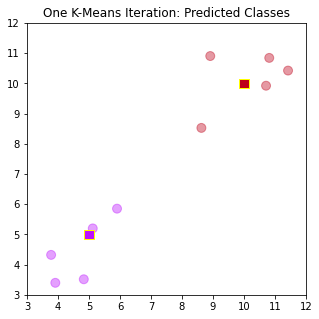

In [42]:

# Давайте рассмотрим это визуально, построив график как двух кластеров, 
# так и их назначенных меток с цветовым отображением:

    
c1, c2 = ['#bc13fe', '#be0119']  # https://xkcd.com/color/rgb/
llim, ulim  = np.trunc([X.min() * 0.9, X.max() * 1.1])
_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(*X.T, c=np.where(labels, c2, c1), alpha=0.4, s=80)
ax.scatter(*centroids.T, c=[c1, c2], marker='s', s=95, edgecolor ='yellow')
ax.set_ylim([llim, ulim])
ax.set_xlim([llim, ulim])
ax.set_title('One K-Means Iteration: Predicted Classes')